# Julia Sets

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

In [3]:
def julia(c, size=256, center=(0.0, 0.0), zoom=1.0, iters=256):
    x, y = np.meshgrid(
        np.linspace(-1, 1, size)/zoom + center[0], 
        np.linspace(-1, 1, size)/zoom + center[1], 
    )
    z = x + 1j * y
    im = np.zeros(z.shape)
    ix = np.ones(z.shape, dtype=bool)
    for i in range(iters):
        z[ix] = z[ix] ** 2 + c
        ix = np.abs(z) < 2
        im += ix
    return im

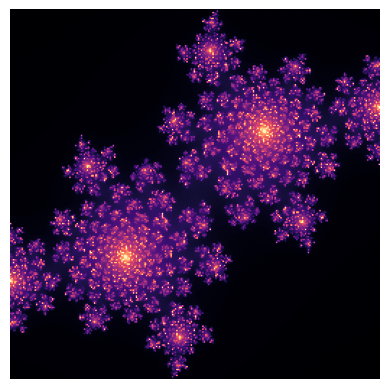

In [4]:
plt.imshow(julia(-0.4+0.6j), cmap='magma')
plt.axis(False);

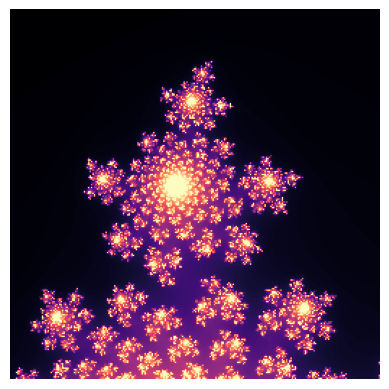

In [5]:
plt.imshow(julia(-0.4+0.6j, center=(0.34, -0.30), zoom=10000.0), cmap='magma')
plt.axis(False);

In [7]:
c = (
    -0.4 + 0.6j, 
    -0.74543 + 0.11301j, 
    -0.75 + 0.11j, 
    -0.1 + 0.651j,
    -0.835 - 0.2321j,
    -0.70176 - 0.3842j,
)

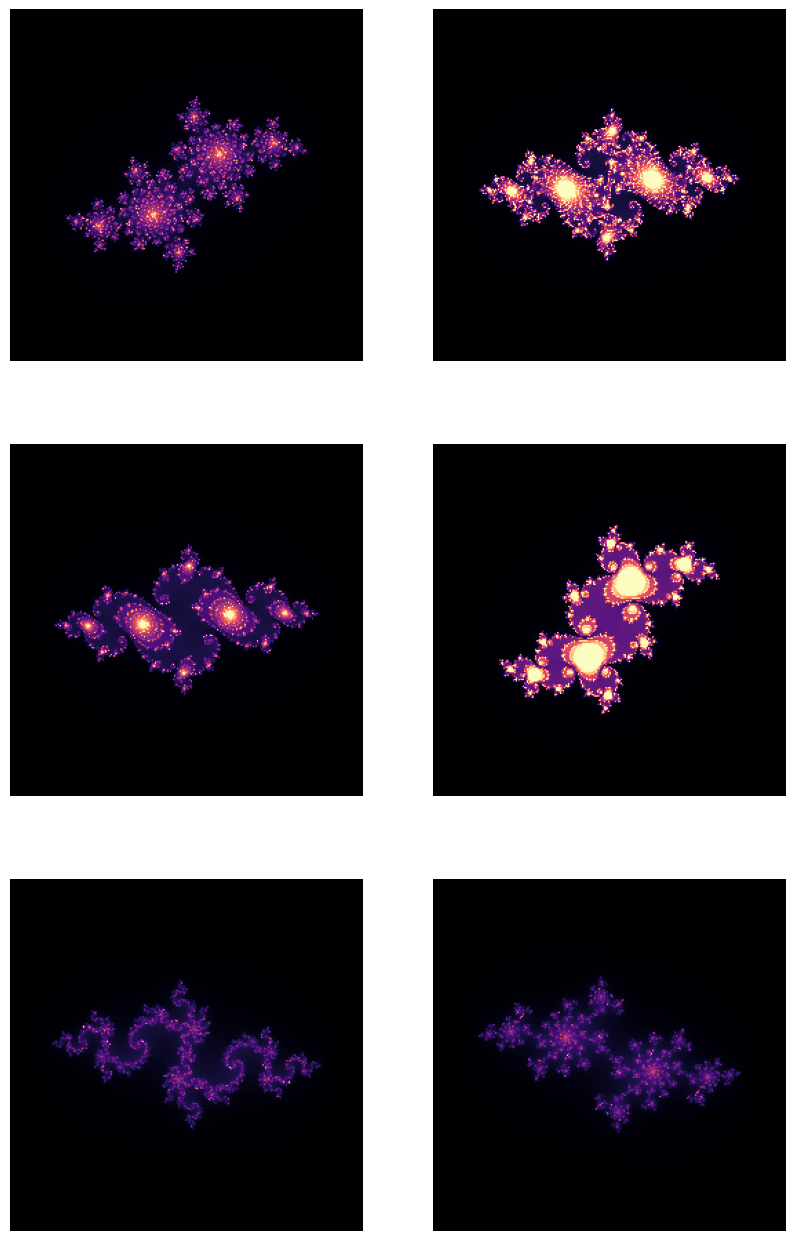

In [8]:
noise_level = 0.0

fig, ax = plt.subplots(3, 2, figsize=(10, 16))
for c_, a in zip(c, ax.flatten()):
    img = julia(c_, zoom=0.5) 
    img += np.random.randn(*img.shape) * noise_level
    a.imshow(img, cmap='magma')
    a.axis(False)

# Image processing

In [9]:
from skimage import filters

In [10]:
from skimage.morphology import disk
from skimage import restoration

In [11]:
noise_level = 50.0
img = julia(-0.4+0.6j, size=200)
noise_img = img + np.random.randn(*img.shape) * noise_level
median_img = filters.median(noise_img, disk(3))
tv_img = restoration.denoise_tv_chambolle(noise_img, weight=20.0)
wavelet_img = restoration.denoise_wavelet(noise_img)
gaussian_img = filters.gaussian(noise_img, sigma=1.8)

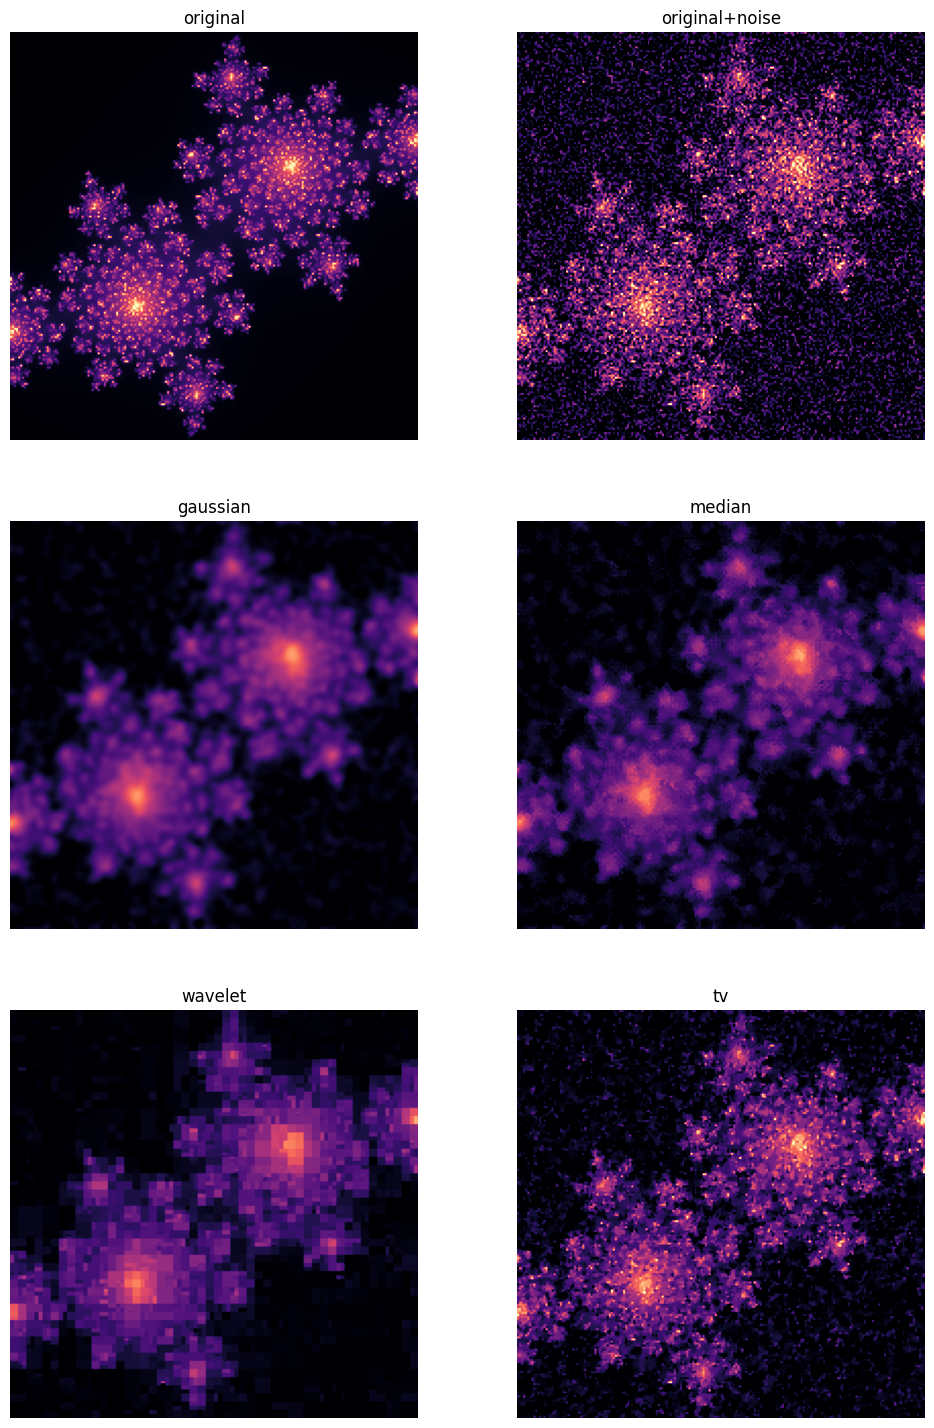

In [12]:
fig, ax = plt.subplots(3, 2, figsize=(12, 18))
for a, (im, title) in zip(
    ax.flatten(),
    ((img, 'original'), 
     (noise_img, 'original+noise'),
     (gaussian_img, 'gaussian'),
     (median_img, 'median'), 
     (wavelet_img, 'wavelet'),
     (tv_img, 'tv'), )):
    a.imshow(im, cmap='magma', vmin=0, vmax=255)
    a.axis(False)
    a.set_title(title)

# DataJoint Pipeline

In [ ]:
import datajoint as dj

In [ ]:
schema = dj.Schema('julia')

In [ ]:
img.max()